#**Modelo de Regressão Linear Múltipla**
Sua tarefa é **prever os valores médios** das casas nos distritos da Califórnia 🏡, considerando uma série de características desses distritos.

Vamos lá? 😀

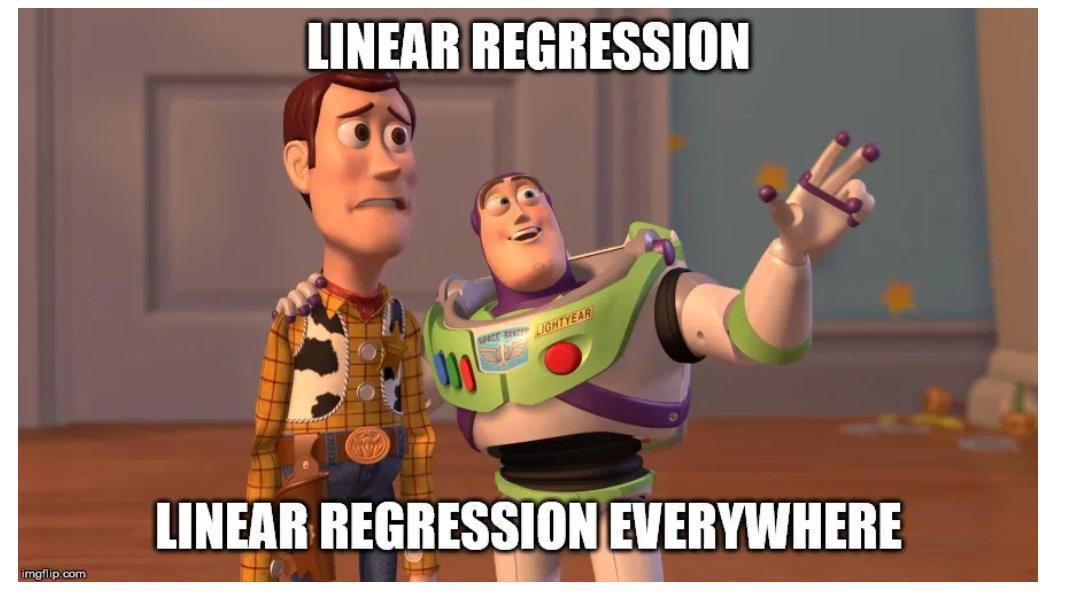

# Importando os dados

In [1]:
%pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
# para deixar todas as saídas com os mesmos valores obtidos na live.
np.random.seed(42)


import os

# Para plots bonitinhos
%matplotlib inline

In [3]:
dataset = pd.read_csv("housing.csv")

In [4]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Configurações

configuracao do tamanho das fontes dos rótulos dos eixos e dos ticks (marcadores) em gráficos gerados com o Matplotlib. A função mpl.rc é utilizada para alterar parâmetros globais de estilo dos gráficos, chamados de rcParams.

No primeiro comando, mpl.rc('axes', labelsize=14), o tamanho da fonte dos rótulos dos eixos (por exemplo, "Eixo X" e "Eixo Y") é definido como 14. Os dois comandos seguintes, mpl.rc('xtick', labelsize=12) e mpl.rc('ytick', labelsize=12), definem o tamanho da fonte dos números ou textos que aparecem ao longo dos eixos X e Y como 12.

Essas configurações ajudam a padronizar e melhorar a legibilidade dos gráficos, especialmente em apresentações ou relatórios. Ao definir esses parâmetros no início do notebook ou script, todos os gráficos subsequentes seguirão esse padrão automaticamente, evitando a necessidade de configurar manualmente cada gráfico.

In [6]:


mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Conhecendo os dados 🤓

In [7]:
dataset.shape

(20640, 10)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Opa! Observe aqui que **total_bedrooms** possui **20433** linhas de informações preenchidas (não nulos). Isso significa que **207** bairros não possuem características.🤔

A única variável do tipo texto é "ocean_proximity". Vamos analisar quantas categorias existem e quantos bairros pertencem a essas categorias utilizando a função value_counts()?

In [9]:
set(dataset["ocean_proximity"])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [10]:
dataset["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Agora vamos analisar os dados do tipo numérico com a função describe():

In [11]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Analisando algumas distribuições com histogramas:

O código `dataset.hist(bins=50, figsize=(20,15))` está utilizando o método hist de um DataFrame do pandas para gerar histogramas de todas as colunas numéricas do conjunto de dados chamado dataset.

- O parâmetro `bins=50` define que cada histograma será dividido em 50 intervalos (ou "caixas"), permitindo uma visualização mais detalhada da distribuição dos dados em cada coluna.
- O parâmetro `figsize=(20,15`) ajusta o tamanho da figura gerada para 20 polegadas de largura por 15 polegadas de altura, facilitando a visualização dos gráficos, especialmente quando há muitas colunas.
Esse comando é muito útil para análise exploratória de dados, pois permite identificar rapidamente padrões, tendências, outliers e possíveis problemas de distribuição nas variáveis numéricas do dataset. Cada histograma mostra como os valores de uma coluna estão distribuídos, ajudando a entender melhor o comportamento dos dados antes de aplicar técnicas de modelagem ou transformação.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

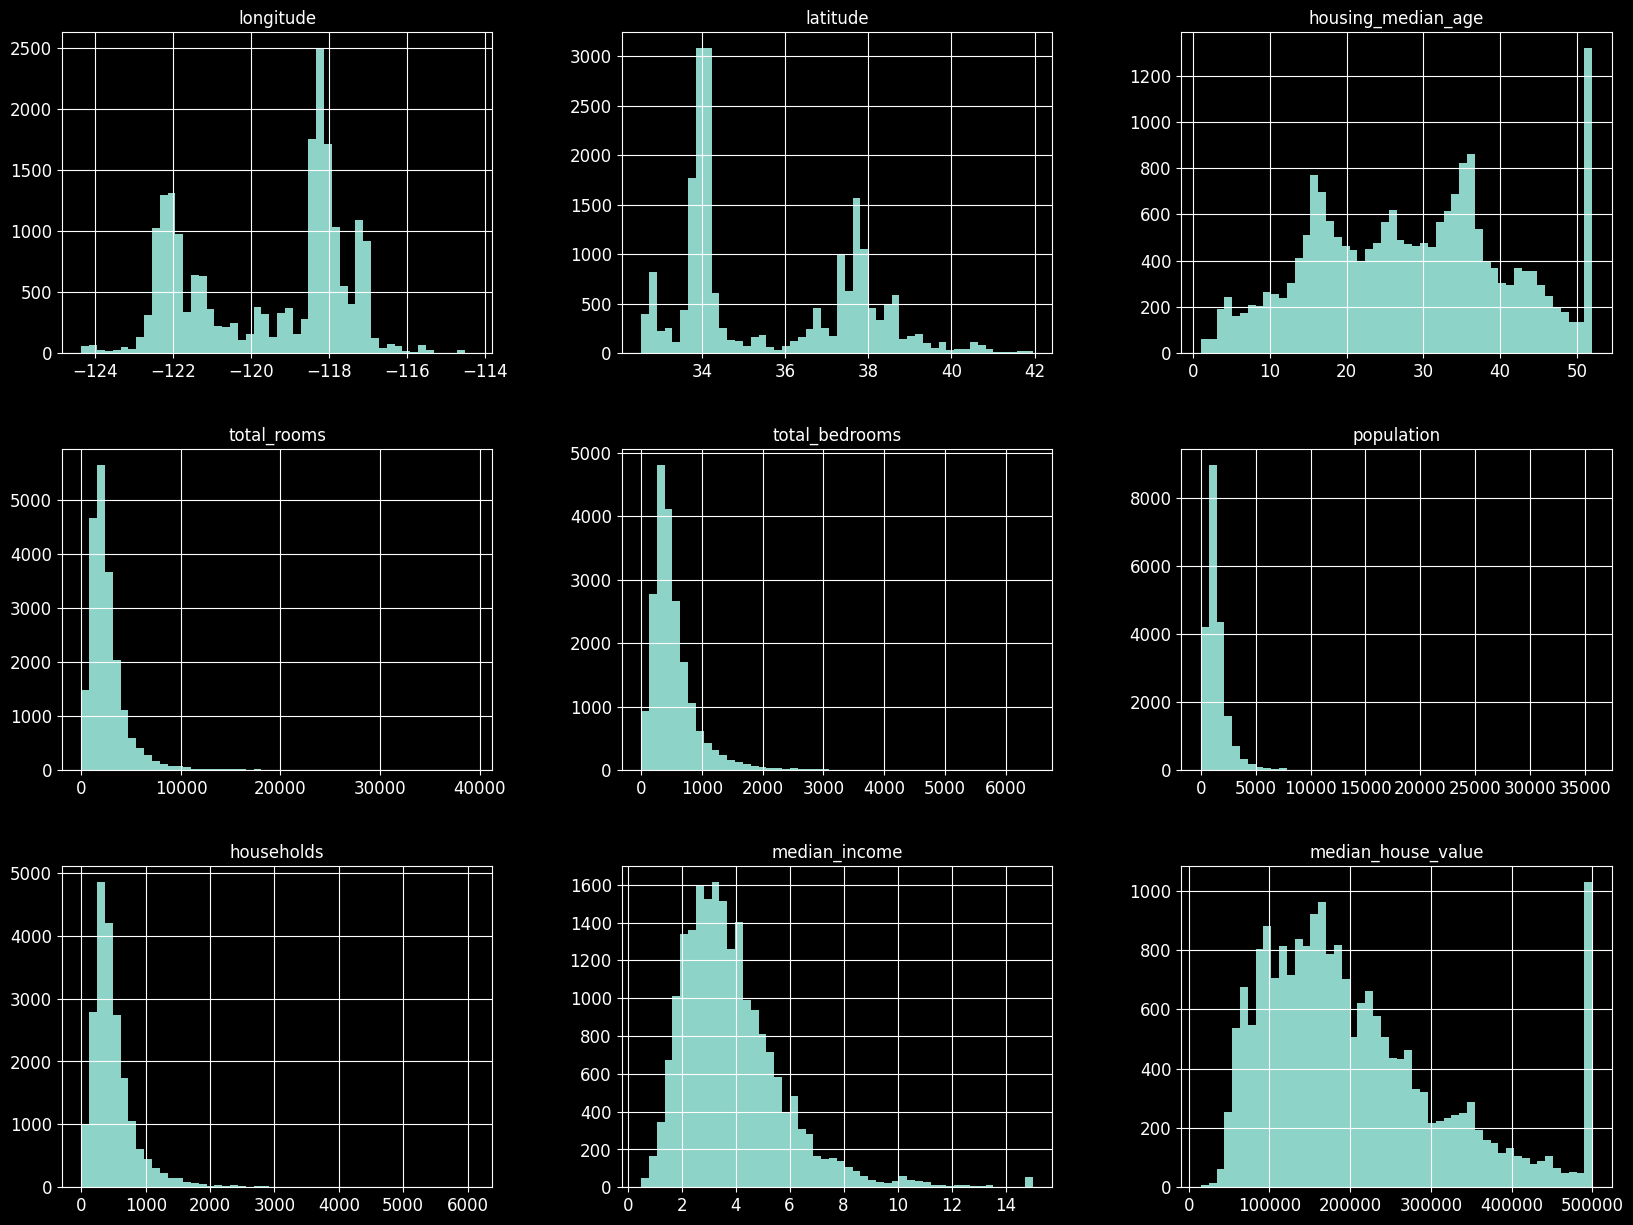

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))

Observações encontradas:

- median_income (renda média) não parece estar expresso em dólares americanos, dê uma olhadinha na escala dos dados. Aqui precisamos falar de dados dimensionados!

- a variável median_house_value (nossa target) também parece estar limitada em casas até 500 mil dólares. Aqui seria interessante entender com o cliente se o mesmo deseja que o algoritmo ultrapasse esse limite ou não.

- podemos identificar bastante assimetria nos dados.

# Separando as bases em treino e teste

In [13]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dataset, test_size = 0.2, random_state = 7)
print(len(df_train), "treinamento +", len(df_test), "teste")

16512 treinamento + 4128 teste


O trecho de código apresentado utiliza a função `train_test_split` da biblioteca `sklearn.model_selection` para dividir um conjunto de dados chamado dataset em dois subconjuntos: um para treinamento (df_train) e outro para teste (df_test). O parâmetro `test_size=0.2` indica que 20% dos dados serão reservados para teste, enquanto os 80% restantes serão usados para treinar o modelo. O parâmetro `random_state=7` garante que a divisão seja reprodutível, ou seja, sempre que o código for executado com esse valor, a separação dos dados será a mesma.

Após a divisão, o código imprime o tamanho de cada subconjunto, mostrando quantas amostras foram destinadas ao treinamento e quantas ao teste. Isso é útil para verificar rapidamente se a divisão ocorreu conforme o esperado. O uso dessa abordagem é uma prática comum em projetos de machine learning, pois permite avaliar o desempenho do modelo em dados que ele nunca viu durante o treinamento, reduzindo o risco de overfitting e fornecendo uma estimativa mais realista da performance em produção

## Criando categorias de média de renda anual 🤑

Vamos supor que algum especialista da área de vendas de imóveis notificou que a **média de renda anual é um atributo importante para colocar no modelo preditivo para estimar preços médios**.

Quando dividimos o conjunto de treino e teste **precisamos garantir que ambos sejam representativos com todos os valores de renda anual**.Como a média de renda anual é um atributo numérico, que tal criar uma categoria de renda ?

<Axes: >

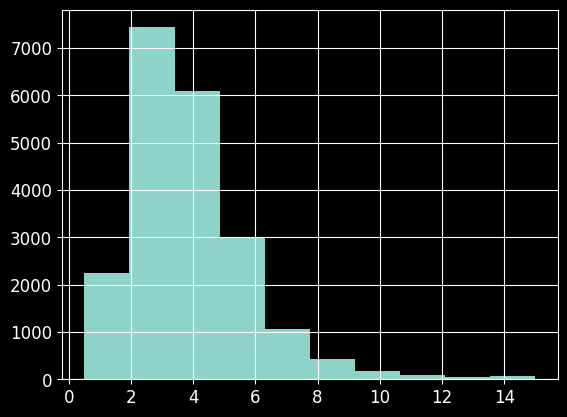

In [14]:
dataset["median_income"].hist()

In [15]:
# Divida por 1,5 para limitar o número de categorias de renda
# dividindo o valor da coluna "median_income" de cada entrada pelo valor 1,5 e, em seguida, arredondando o resultado para cima usando a função
# np.ceil() (da biblioteca NumPy). Isso cria uma nova coluna chamada "income_cat" no dataset que contém os valores das categorias de renda após
# a divisão e arredondamento.

dataset["income_cat"] = np.ceil(dataset["median_income"] / 1.5) # ceil para arredondar valores para cima


In [16]:

# Rotule aqueles acima de 5 como 5.
# os valores na coluna "income_cat" que forem maiores ou iguais a 5 são substituídos por 5. Isso é feito usando a função .where() do pandas.
# Basicamente, se o valor em "income_cat" for menor que 5, ele permanece o mesmo; caso contrário, é substituído por 5.

dataset["income_cat"].where(dataset["income_cat"] < 5, 5.0, inplace=True)

C:\Users\junio\AppData\Local\Temp\ipykernel_2940\2909401304.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["income_cat"].where(dataset["income_cat"] < 5, 5.0, inplace=True)


In [17]:
#eturn a Series containing counts of unique values. The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.
dataset["income_cat"].value_counts()

income_cat
3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: count, dtype: int64

In [18]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3.0


<Axes: >

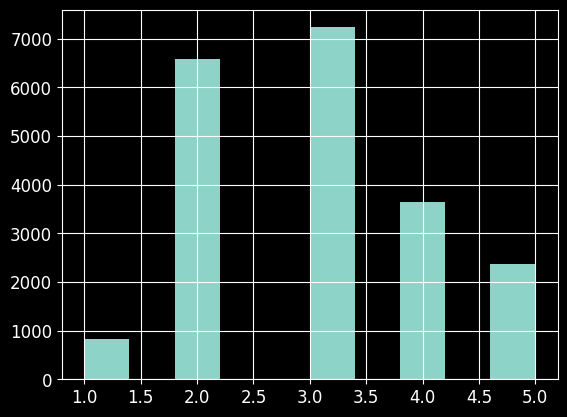

In [19]:
dataset["income_cat"].hist()

Resumindo, esse código está transformando valores contínuos de renda em categorias discretas, dividindo-os em intervalos específicos e arredondando-os para cima, garantindo que o número de categorias seja limitado e, finalmente, atribuindo rótulos numéricos a essas categorias.


-----

Boa! Agora com as categorias criadas, vamos realizar a amostragem estratificada com base na categoria de renda!

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["income_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

O objetivo desse trecho de código é dividir o conjunto de dados (dataset) em dois subconjuntos: treino e teste, mantendo a proporção das classes presentes em uma coluna categórica (income_cat). Isso é importante para garantir que ambos os conjuntos representem bem a distribuição original dos dados, evitando viés no treinamento e avaliação do modelo.

Explicação do Código

- `StratifiedShuffleSplit`: Essa classe do scikit-learn permite dividir os dados de forma aleatória, mas mantendo a proporção das classes especificadas (no caso, income_cat).
- `n_splits=1`: Apenas uma divisão será feita (um conjunto de treino e um de teste).
- `test_size=0.2`: 20% dos dados vão para o conjunto de teste.
- `random_state=42`: Garante reprodutibilidade da divisão.

O método split retorna os índices das linhas para treino e teste, mantendo a proporção das categorias de income_cat. Em seguida, esses índices são usados para selecionar as linhas correspondentes no DataFrame original.

Pontos de Atenção
- Estratificação: É fundamental quando se trabalha com dados desbalanceados, pois evita que uma classe fique sub-representada em algum dos conjuntos.
- Uso de índices: O método retorna apenas os índices, por isso é necessário usar .loc para acessar as linhas do DataFrame.


Esses dicionários mostram a proporção de cada categoria em cada subconjunto, ajudando a verificar se a estratificação foi feita corretamente.

O trecho `for train_index, test_index in split.split(dataset, dataset["income_cat"])`: está utilizando um gerador de índices para dividir o conjunto de dados em conjuntos de treino e teste, usando uma estratégia de validação cruzada Do StratifiedKFold do scikit-learn.

Aqui está uma explicação detalhada:

split.split(dataset, dataset["income_cat"]): chama o método split do objeto split, passando o dataset completo e a coluna income_cat como rótulo (y). Isso garante que a divisão mantenha a proporção das categorias de renda nos conjuntos de treino e teste.
O método split retorna um gerador que, a cada iteração, fornece dois arrays de índices: um para treino (train_index) e outro para teste (test_index).
O for itera sobre cada divisão gerada, permitindo que você acesse os índices para separar os dados conforme necessário.

In [21]:
# Analisando as proporções
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114341
1.0    0.039971
Name: count, dtype: float64

In [22]:
# Analisando as proporções
strat_train_set["income_cat"].value_counts() / len(strat_train_set)

income_cat
3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114462
1.0    0.039789
Name: count, dtype: float64

In [23]:
dataset["income_cat"].value_counts() / len(dataset)

income_cat
3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: count, dtype: float64

Show! Depois de garantir que os valores médios de renda anual estão distribuídos de forma estratificada, podemos remover a coluna income_cat que utilizamos como variável auxiliar.

In [24]:
# Removendo o income_cat das bases de treino e teste
# O uso do termo set_ é uma convenção para indicar que é uma variável temporária que itera sobre um conjunto de dados (um conjunto de treinamento ou um conjunto de teste).

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Analisando dados geográficos 🗾

In [25]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

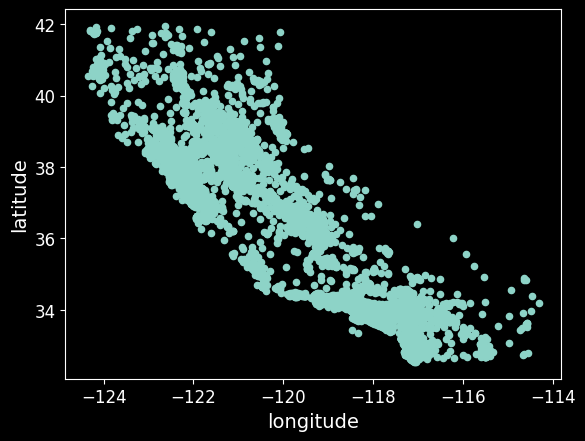

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude")

OK! Nos parece o estado da Caifornia 🏖 Vamos visualizar as concentrações de pontos?

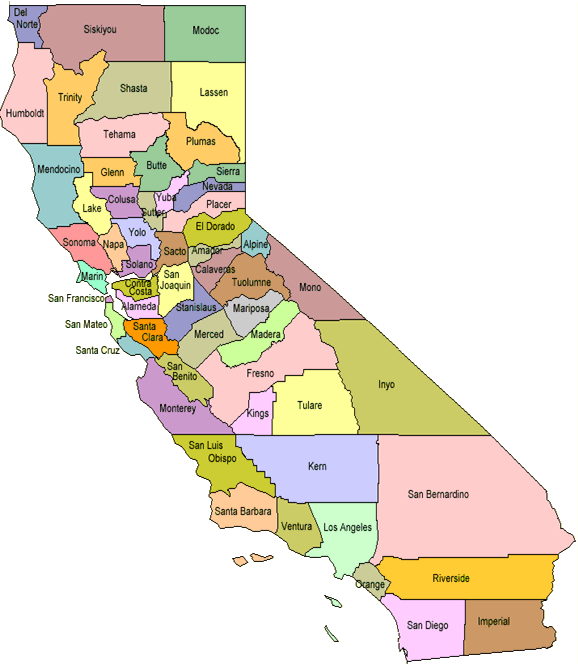

<Axes: xlabel='longitude', ylabel='latitude'>

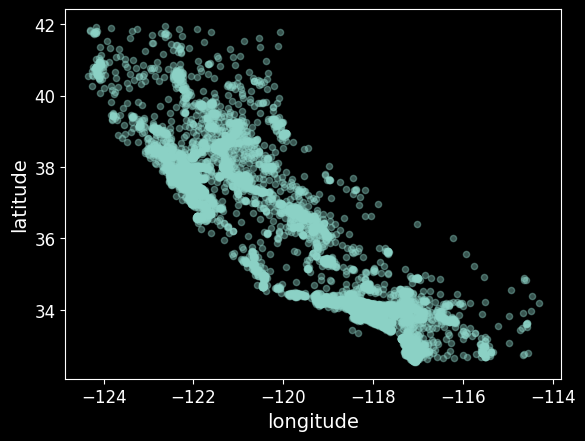

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4)

# Analisando preços imobiliários 🏠💰

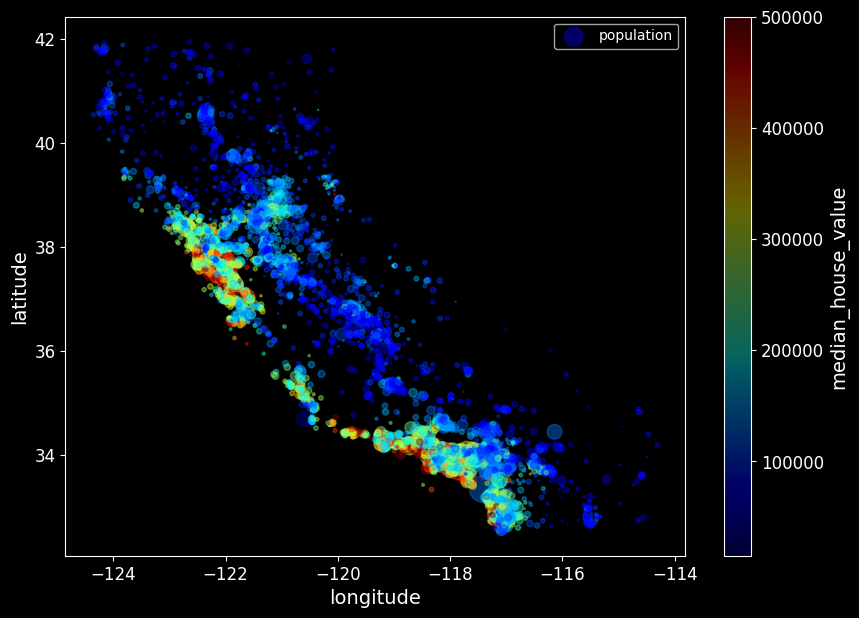

In [28]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Podemos identificar que os preços estão muito relacionados com a localização (por exemplo, próximo do oceano) e com a densidade populacional.

# Buscando correlações 🔎

In [29]:
# Fazendo uma cópia do DataFrame
housing_co = housing.copy()

# Removendo a coluna 'ocean_proximity' corretamente (especificando axis=1)
housing_co = housing_co.drop("ocean_proximity", axis=1)

# Calculando a matriz de correlação
corr_matrix = housing_co.corr()
corr_matrix


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


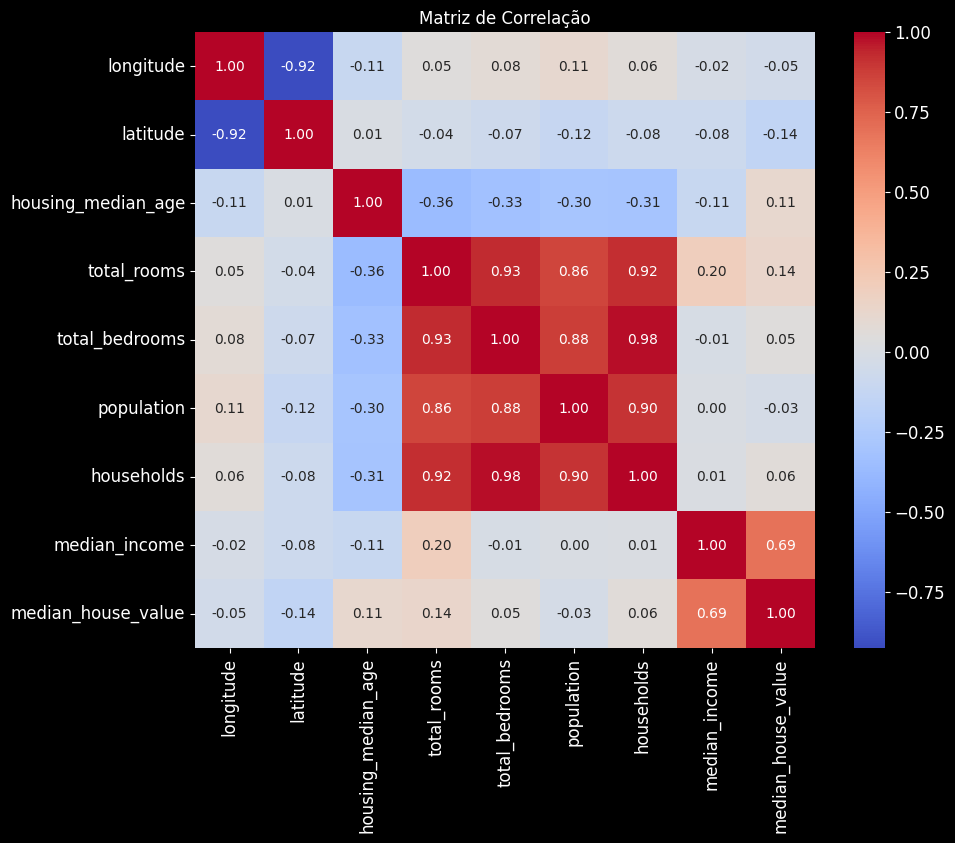

In [30]:


plt.figure(figsize=(10, 8)) # Ajusta o tamanho da figura
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [31]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

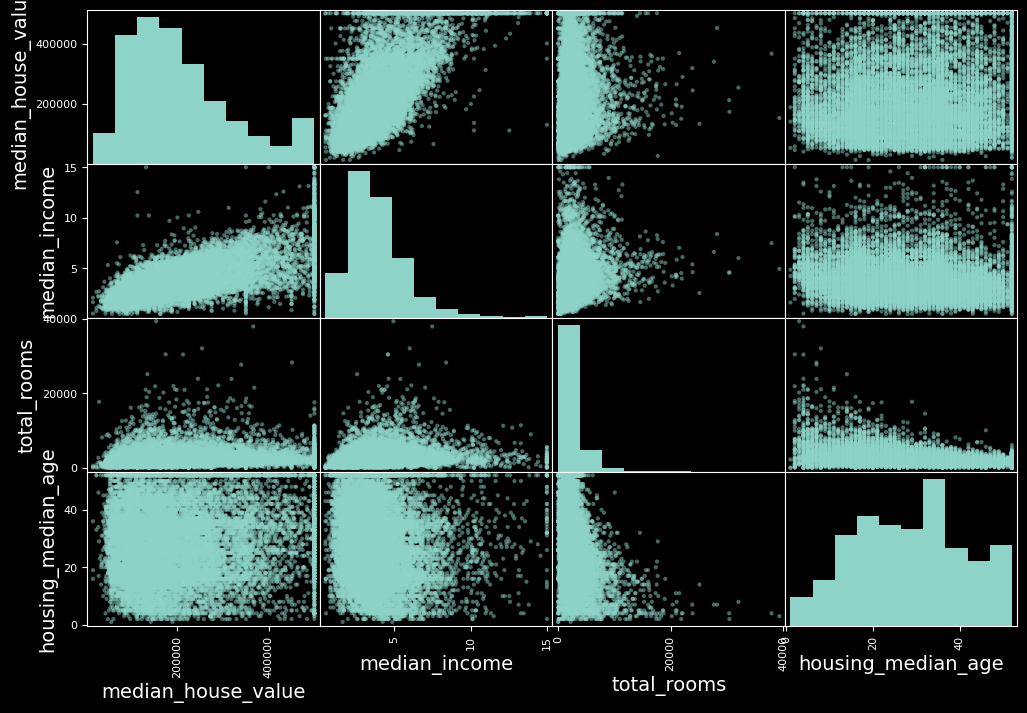

In [32]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

Analisando as correlações, a feature que seja mais promissora para prever o valor médio da habitação é a **renda média**.

median_income : 0.68 de correlação.

Vamos plotar essas duas features em um gráfico de scatter para analisar com mais detalhes:

(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

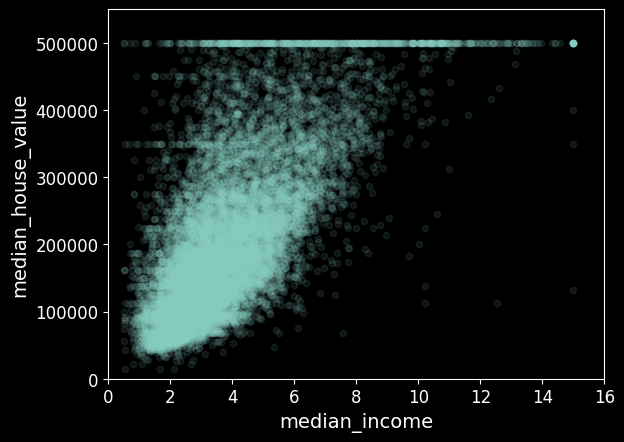

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

1. Eixos:
- Eixo X (Horizontal): median_income: Representa a renda mediana na região. Pelo plt.axis([0, 16, ...]), vemos que os valores de renda vão de 0 até 16 (provavelmente em dezenas de milhares de dólares, ou alguma unidade similar, dependendo da fonte do dataset – no dataset original da Califórnia, é em dezenas de milhares).
- Eixo Y (Vertical): median_house_value: Representa o valor mediano das casas na região. Pelo plt.axis([..., 0, 550000]), os valores vão de 0 até 550.000 (provavelmente em dólares).
2. alpha=0.1 (Transparência):
- Este parâmetro é crucial aqui. Ele torna cada ponto individual bastante transparente (90% transparente).
- Importância: Quando você tem muitos pontos de dados, eles podem se sobrepor e formar uma "mancha" sólida, dificultando a visualização da densidade. Com alpha baixo, as áreas onde muitos pontos se sobrepõem ficam mais escuras, enquanto áreas com poucos pontos ficam mais claras. Isso te dá uma ideia da densidade da distribuição dos dados.
3. Interpretação dos Padrões no Gráfico:
- Correlação Positiva Clara: A nuvem de pontos tem uma tendência geral de subir da esquerda para a direita. Isso significa que, à medida que median_income aumenta, median_house_value também tende a aumentar. Isso confirma visualmente a correlação positiva de +0.69 que vimos na matriz.
- Concentração de Dados:
    - A maior densidade de pontos (áreas mais escuras) parece estar na faixa de median_income entre aproximadamente 2 e 5 (ou 6), com median_house_value concentrado abaixo de 250.000-300.000. Isso indica que a maioria das regiões no seu dataset se enquadra nessas faixas de renda e valor de imóvel.
- Dispersão (Variância):
    - A relação não é perfeitamente linear. Para um mesmo nível de median_income, existe uma variação considerável nos valores de median_house_value.
    - A dispersão parece aumentar um pouco com o aumento da renda. Ou seja, para rendas mais altas, a faixa de preços dos imóveis parece ser mais ampla.
- Limite Superior (Capping) em median_house_value:
    - Há uma linha horizontal muito nítida de pontos no topo do gráfico, em torno de median_house_value = 500.000. Isso é uma característica muito importante e comum em datasets de habitação.
    - O que significa: Provavelmente, os valores das casas foram "capados" ou "limitados" em 500.000. Ou seja, qualquer casa com valor mediano de 500.000 ou mais foi registrada como 500.000.
    - Implicações: Isso pode ser um problema para modelos de previsão, pois o modelo não aprenderá a prever valores acima de 500.000. Se seu objetivo é prever valores mais altos, você pode precisar considerar remover esses pontos capados ou encontrar dados não capados. Para modelos que tentam aprender a verdadeira relação, esse cap introduz um viés.
- Outliers ou Pontos Isolados:
    - Existem alguns pontos com median_income bem alta (acima de 10) que ainda estão no limite de 500.000.
    - Há um ponto bem isolado no canto superior direito com median_income perto de 15 e median_house_value em 500.000 (o ponto mais escuro nessa região).
- Linearidade da Relação: Embora haja uma tendência linear positiva, a forma da nuvem de pontos não é uma linha reta perfeita. Modelos lineares (como a Regressão Linear Simples que discutimos) capturarão a tendência principal, mas podem não explicar toda a variação, especialmente devido ao cap e à dispersão crescente.

**Em Resumo:** 
O gráfico mostra uma forte relação positiva entre renda mediana e valor mediano da casa. A maioria dos dados se concentra em rendas e valores mais baixos/médios. Uma característica dominante é o teto de 500.000 no valor da casa, que precisa ser levado em conta em qualquer modelagem. O uso de alpha ajuda a visualizar onde os dados são mais densos.

Observamos que:
A correlação realmente mostra uma certa tendência ascendente nos dados e os pontos não estão mais dispersos.

O limite de preço que temos na base de dados é claramente visível como uma linha horizontal em 500 mil dólares. Observe também que temos essas linhas retas (claro que menos óbvias) na horizontal em torno de 450 mil dólares, outra em 350 mil dólares e uma em 280 mil dólares.

Será que se deixarmos essas peculiaridades nos dados, não pode afetar nosso algoritmo? ❓🤔


# Preparando os dados para colocar no algoritmo 🧰
## Tratamento de colunas nulas

In [34]:
housing = strat_train_set.drop("median_house_value", axis=1) # apagando a target para a base de treino (nosso x)
housing_labels = strat_train_set["median_house_value"].copy() #armazenando a target (nosso y)

In [35]:
# listando as colunas nulas

sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [36]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

OK, como vamos tratar esses valores nulos? ❓🤔

In [37]:
#Opção 1
# Substituindo os valores nulos pela mediana

# 1. Calcula a mediana da coluna "total_bedrooms" do DataFrame 'housing'
median = housing["total_bedrooms"].median()

# 2. Preenche os valores nulos na coluna "total_bedrooms" de 'sample_incomplete_rows'
#    com a mediana calculada anteriormente.
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

# 3. Exibe o DataFrame 'sample_incomplete_rows' (presumivelmente para verificar o resultado)
sample_incomplete_rows

C:\Users\junio\AppData\Local\Temp\ipykernel_2940\380995133.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [38]:
sample_incomplete_rows.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

### Utilizando as classes do Sklearn!

Você também pode optar por utilizar classes acessíveis do Sklearn!

Você pode criar pipelines de pré-processamento e modelagem com facilidade usando as classes do Scikit-Learn. Isso permite criar fluxos de trabalho mais organizados e repetíveis.

Vamos utilizar o **Imputer** para substituir os valores faltantes pela média.

In [39]:
# Opção 2

# 1. Tenta importar SimpleImputer da localização mais recente no Scikit-Learn
try:
    from sklearn.impute import SimpleImputer # Para Scikit-Learn versão 0.20 ou mais recente
# 2. Se a importação acima falhar (provavelmente devido a uma versão mais antiga do Scikit-Learn)
except ImportError:
    # Importa a classe Imputer mais antiga e a renomeia para SimpleImputer por consistência
    from sklearn.preprocessing import Imputer as SimpleImputer




Remova o atributo de texto porque a mediana só pode ser calculada em atributos numéricos:

In [40]:
# 3. Cria uma instância (um objeto) do SimpleImputer
imputer = SimpleImputer(strategy="median")

# Cria um novo DataFrame 'housing_num' removendo a coluna 'ocean_proximity' do DataFrame 'housing'
housing_num = housing.drop('ocean_proximity', axis=1)
# Alternativa, se você quisesse selecionar apenas colunas numéricas (mais robusto se houver outras não numéricas):
# housing_num = housing.select_dtypes(include=[np.number])

# "Treina" o imputador: calcula a mediana de cada atributo (coluna) em 'housing_num'
# e armazena esses resultados internamente no objeto 'imputer', especificamente na variável 'statistics_'.
imputer.fit(housing_num)

# Exibe as medianas calculadas que foram armazenadas.
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

1. `imputer = SimpleImputer(strategy="median")`
- Como discutido antes, esta linha cria um objeto SimpleImputer.
- Este objeto está configurado para usar a mediana como estratégia para preencher valores ausentes.
- Neste ponto, o imputer sabe o que fazer (usar a mediana), mas ainda não sabe quais medianas usar, pois não viu nenhum dado.
2. `housing_num = housing.drop('ocean_proximity', axis=1)`
- `housing`: Seu DataFrame original.
- `.drop('ocean_proximity', axis=1)`: Este método cria uma nova cópia do DataFrame housing, mas sem a coluna chamada 'ocean_proximity'.
    - `ocean_proximity`: O nome da coluna a ser removida.
    -  `axis=1`: Especifica que estamos removendo uma coluna (se fosse axis=0, estaríamos tentando remover uma linha com esse rótulo).
- `housing_num = ...`: O novo DataFrame (contendo apenas as colunas restantes, que se presume serem majoritariamente numéricas) é atribuído à variável housing_num.
- Motivo Provável: A coluna 'ocean_proximity' é tipicamente categórica (ex: "NEAR BAY", "<1H OCEAN"). Calcular a mediana de uma coluna de texto não faz sentido. Portanto, ela é removida para que o imputer trabalhe apenas com as colunas numéricas, onde a mediana é uma estatística válida.
Observação: Se houvesse outras colunas não numéricas além de 'ocean_proximity' em housing, uma abordagem mais robusta para obter apenas as colunas numéricas seria housing_num = housing.select_dtypes(include=[np.number]) (após importar numpy as np).
3. `imputer.fit(housing_num)`
- Este é o passo crucial de "treinamento" do imputador.
- i`mputer.fit(...)`: Você está chamando o método fit do objeto imputer que você criou.
- `housing_num`: Você está passando o DataFrame housing_num (que contém apenas as colunas numéricas) para o método fit.
- **O que acontece aqui:**
    - O imputer itera sobre cada coluna de housing_num.
    - Para cada coluna, ele calcula a estatística especificada na strategy (neste caso, a mediana).
    - Essas medianas calculadas (uma para cada coluna em housing_num) são armazenadas internamente dentro do objeto imputer. Elas ficam disponíveis através do atributo statistics_.
- Importante: O método fit não modifica o DataFrame housing_num original. Ele apenas aprende as estatísticas a partir dele.
4. `imputer.statistics_`
- Após o imputer ter sido "treinado" com fit, o atributo statistics_ (note o underscore no final, que é uma convenção em Scikit-learn para atributos que são aprendidos durante o fit) se torna disponível.
- Este atributo contém um array NumPy com as medianas que foram calculadas para cada uma das colunas em housing_num (na mesma ordem das colunas em housing_num).
- Ao executar esta linha, você verá essas medianas impressas na tela. Cada valor no array corresponde à mediana da respectiva coluna que o imputer processou.

**Em resumo:**
O código primeiro prepara um conjunto de dados numéricos (housing_num) removendo uma coluna categórica. Em seguida, ele "treina" o SimpleImputer nesses dados numéricos. O treinamento consiste em calcular a mediana para cada coluna numérica. Finalmente, ele exibe essas medianas calculadas.

Verifique se isso é o mesmo que calcular manualmente a mediana de cada atributo:

In [41]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

Aplicando o Imputer "treinado" na base para substituir valores faltantes perdidos pela mediana:

In [42]:

# imputer = SimpleImputer(strategy="median")
# housing_num = housing.drop('ocean_proximity', axis=1) # ou housing.select_dtypes(include=[np.number])
# imputer.fit(housing_num)

# 1. Aplica a transformação: preenche os valores NaN em 'housing_num'
#    usando as medianas aprendidas durante o .fit(). O resultado é um array NumPy.
X = imputer.transform(housing_num)

# 2. Converte o array NumPy 'X' de volta para um DataFrame do Pandas.
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
#   Alternativamente, poderia usar housing_num.index se você tivesse certeza que
#   housing_num mantém o mesmo índice que housing original após o drop/select_dtypes.
#   Usar housing.index é mais seguro se housing_num foi criado de forma a
#   potencialmente reindexar (embora .drop() e .select_dtypes() geralmente preservem o índice).

# 3. Exibe o DataFrame 'housing_tr' transformado.
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


**Explicação Detalhada:**
1. `X = imputer.transform(housing_num)`
- `imputer.transform(...)`: Agora você está usando o método transform do objeto imputer que já foi "treinado" (ou seja, já aprendeu as medianas de cada coluna com o imputer.fit(housing_num)).
- `housing_num`: Você passa o mesmo DataFrame (ou um DataFrame com a mesma estrutura de colunas) para o método transform.
- O que acontece aqui:
    - O imputer percorre cada coluna de housing_num.
    - Se encontrar um valor NaN (ausente) em uma coluna, ele o substitui pela mediana correspondente que foi calculada e armazenada no atributo imputer.statistics_ durante a etapa fit.
    - Se um valor não for NaN, ele permanece inalterado.
- `X = ...`: O resultado da operação transform é um array NumPy. É importante notar que os transformadores do Scikit-learn geralmente retornam arrays NumPy por padrão, mesmo que a entrada seja um DataFrame do Pandas. Este array X agora contém os mesmos dados de housing_num, mas com os valores ausentes preenchidos.
2. `housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing.index)`
- `pd.DataFrame(...)`: Você está usando o construtor do Pandas para criar um novo DataFrame.
- ´: O primeiro argumento é o array NumPy que contém os dados (agora com os NaNs preenchidos).
- `columns=housing_num.columns`: Este argumento é crucial. Ele atribui os nomes das colunas originais (de housing_num) ao novo DataFrame. Sem isso, as colunas seriam nomeadas com inteiros (0, 1, 2,...).
- ´: Este argumento atribui os rótulos de índice originais (do DataFrame housing completo) ao novo DataFrame. Isso garante que as linhas no novo DataFrame housing_tr correspondam às mesmas linhas nos DataFrames originais.
    - Usar housing.index é uma escolha segura para manter a consistência com o DataFrame original completo. Se housing_num foi criado de uma forma que garante que seu índice é idêntico ao de housing (o que é o caso com housing.drop(...) ou housing.select_dtypes(...) se não houver filtragem de linhas), então housing_num.index também funcionaria.
- `housing_tr = ...`: O novo DataFrame do Pandas, agora com os valores ausentes imputados e com os nomes de coluna e rótulos de índice corretos, é atribuído à variável housing_tr (provavelmente significando "housing transformed" ou "housing trained/treated").
3. `housing_tr`
- Esta linha, quando executada em um ambiente interativo (como Jupyter Notebook), exibirá o conteúdo do DataFrame housing_tr.
- Você poderá inspecioná-lo para confirmar que os valores ausentes nas colunas numéricas foram de fato preenchidos e que as colunas e índices estão corretos. Você pode verificar isso usando housing_tr.isnull().sum() para ver se há algum valor nulo restante nas colunas que foram processadas.

**Em Resumo:**
Este código efetivamente aplica a imputação pela mediana aos dados numéricos, preenchendo os valores ausentes. Em seguida, ele reconstrói um DataFrame do Pandas a partir do array NumPy resultante, garantindo que os nomes das colunas e os índices sejam preservados. O DataFrame housing_tr está agora pronto para ser usado em etapas subsequentes da análise de dados ou modelagem de machine learning, com a garantia de que as colunas numéricas (que estavam em housing_num) não possuem mais valores ausentes

In [43]:
# verificando os resultados
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [44]:
# Qual e estratégia utilizada pelo imputer?
imputer.strategy

'median'

## Pré-processando as categorias

Agora vamos pré-processar o recurso de entrada categórica, `ocean_proximity`:

In [45]:
housing_cat = housing[['ocean_proximity']]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


O **OrdinalEncoder** é uma classe da biblioteca scikit-learn, usada para transformar variáveis categóricas ordinais em valores numéricos. Variáveis ordinais são aquelas que têm uma ordem ou hierarquia específica, mas as distâncias entre os valores não são necessariamente significativas.

In [46]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

O **OneHotEncoder** é outra classe da biblioteca scikit-learn, usada para transformar variáveis categóricas em representações numéricas binárias. Ele é particularmente útil quando se lida com variáveis categóricas nominais, ou seja, aquelas que não têm uma ordem específica.

In [48]:
try:
    from sklearn.preprocessing import OrdinalEncoder # apenas para gerar um ImportError se Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20

# Para evitar erro de argumento inesperado, tente usar sparse_output=False (scikit-learn >= 1.2), senão use sparse=False
try:
    cat_encoder = OneHotEncoder(sparse_output=False)
except TypeError:
    cat_encoder = OneHotEncoder(sparse=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

In [49]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### Criando a pipeline de pré-processamento dos dados 🔧

Agora vamos construir um pipeline para pré-processar os atributos numéricos:

Agora, vamos tratar os valores categóricos:

O **ColumnTransformer** é uma classe da biblioteca scikit-learn em Python que permite aplicar transformações específicas a diferentes colunas de um conjunto de dados (dados numéricos, categóricos, etc.) e deseja aplicar diferentes pré-processamentos ou transformações a cada tipo de coluna.

In [50]:
# Importações necessárias
try:
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    # Supondo que SimpleImputer e OneHotEncoder já foram importados ou são importados aqui também
    # from sklearn.impute import SimpleImputer
    # from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import ColumnTransformer # Scikit-Learn < 0.20
    # E possivelmente outras classes de future_encoders se necessário

# --- Pipeline para Atributos Numéricos ---
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), # Passo 1: Imputação
        ('std_scaler', StandardScaler()),             # Passo 2: Padronização
    ])

# Aplica o pipeline numérico APENAS aos dados numéricos (housing_num)
# (Esta linha é mais para demonstração/teste do num_pipeline,
# pois o full_pipeline o aplicará de forma mais integrada)
housing_num_tr = num_pipeline.fit_transform(housing_num)
# Exibe o resultado da transformação dos dados numéricos
housing_num_tr

# --- Preparação para o ColumnTransformer ---
# Lista de nomes das colunas numéricas (obtida de housing_num)
num_attribs = list(housing_num)
# Lista de nomes das colunas categóricas
cat_attribs = ["ocean_proximity"]

# --- Pipeline Completo para Todos os Atributos ---
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),  # Aplica num_pipeline às colunas em num_attribs
        ("cat", OneHotEncoder(), cat_attribs), # Aplica OneHotEncoder às colunas em cat_attribs
    ])

# Aplica o pipeline completo ao DataFrame original 'housing'
housing_prepared = full_pipeline.fit_transform(housing)
# Exibe o resultado final, pronto para modelos de machine learning
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]], shape=(16512, 13))

**Análise Detalhada:**
1. Importações:
- `ColumnTransformer`: Ferramenta chave para aplicar diferentes transformações a diferentes colunas de um DataFrame.
- `Pipeline`: Permite encadear múltiplas etapas de transformação em uma sequência.
- `StandardScaler`: Para padronizar features numéricas (média 0, desvio padrão 1).
- Assume-se que SimpleImputer (para imputação) e OneHotEncoder (para variáveis categóricas) já foram importados ou seriam importados aqui. O bloco try-except com future_encoders é para compatibilidade com versões mais antigas do Scikit-learn.
2. `num_pipeline = Pipeline([...])` (Pipeline para Atributos Numéricos):
- Cria um objeto Pipeline especificamente para processar as colunas numéricas.
- Uma Pipeline é uma lista de tuplas, onde cada tupla é ('nome_do_passo', estimador).
- Passos dentro de `num_pipeline`:
    - `('imputer', SimpleImputer(strategy="median"))`:
        - Nome: `imputer`
        - Estimador: `SimpleImputer(strategy="median")`. Este passo preencherá quaisquer valores NaN nas colunas numéricas usando a mediana da respectiva coluna.
    - `('std_scaler', StandardScaler())`:
        - Nome: std_scaler
        - Estimador: StandardScaler(). Após a imputação, este passo padronizará os dados numéricos. A padronização é importante para muitos algoritmos de machine learning (como SVMs, Regressão Logística, Redes Neurais, PCA) que são sensíveis à escala das features.
3. `housing_num_tr = num_pipeline.fit_transform(housing_num)` e ``housing_num_tr``:
- `housing_num`: Presume-se que este é o DataFrame contendo apenas as colunas numéricas (como criado em exemplos anteriores, ex: housing.drop('ocean_proximity', axis=1) ou housing.select_dtypes(include=[np.number])).
- `num_pipeline.fit_transform(housing_num)`:
    - `fit()`: O Pipeline chama fit_transform no primeiro passo (imputer). O imputer calcula as medianas e transforma os dados (preenchendo NaNs). A saída do imputer (dados imputados) é então passada para o próximo passo. O imputer também chama fit em si mesmo.
    - O Pipeline então chama fit_transform no segundo passo (std_scaler) usando a saída do passo anterior. O std_scaler calcula a média e o desvio padrão e transforma os dados (padronizando-os). Ele também chama fit em si mesmo.
    - Basicamente, o fit percorre todos os transformadores, calculando os parâmetros necessários (medianas, médias, desvios padrão).
    - O `transform` aplica as transformações usando os parâmetros aprendidos.
- `housing_num_tr`: O resultado é um array NumPy com os dados numéricos imputados e padronizados.
- A exibição de housing_num_tr é para verificar se o `num_pipeline` está funcionando como esperado nas colunas numéricas isoladamente.
4. `num_attribs = list(housing_num)` e `cat_attribs = ["ocean_proximity"]`:
- `num_attribs`: Cria uma lista com os nomes das colunas numéricas. Isso é necessário para dizer ao ColumnTransformer em quais colunas aplicar o `num_pipeline`.
- `cat_attribs`: Cria uma lista com o nome da coluna categórica (ou colunas, se houvesse mais).
5. `full_pipeline = ColumnTransformer([...])` (Pipeline Completo):
- Este é o coração do pré-processamento unificado. ColumnTransformer permite aplicar diferentes transformadores ou pipelines a diferentes subconjuntos de colunas.
- É uma lista de tuplas, onde cada tupla é ('nome_do_transformador', transformador, lista_de_colunas_afetadas).
- Transformadores dentro de ColumnTransformer:
    - `("num", num_pipeline, num_attribs)`:
        - Nome: num
    - Transformador: `num_pipeline` (o pipeline que definimos anteriormente para dados numéricos).
    - Colunas: `num_attribs` (a lista de nomes das colunas numéricas).
    - Ação: O `num_pipeline` (com imputação e padronização) será aplicado apenas às colunas listadas em `num_attribs`.
- `("cat", OneHotEncoder(), cat_attribs):`
    - Nome: cat
    - Transformador: OneHotEncoder(). (Importante: Por padrão, OneHotEncoder retorna uma matriz esparsa se o número de categorias for grande. Se você quiser um array denso (NumPy array comum), pode usar OneHotEncoder(sparse_output=False) para versões mais recentes do scikit-learn ou OneHotEncoder(sparse=False) para versões mais antigas. Ele também pode ter um parâmetro handle_unknown='ignore' para lidar com categorias no conjunto de teste que não estavam no conjunto de treino).
    - Colunas: cat_attribs (a lista de nomes das colunas categóricas).
    - Ação: O OneHotEncoder será aplicado apenas à coluna ocean_proximity. Ele criará novas colunas binárias para cada categoria única encontrada.
6. `housing_prepared = full_pipeline.fit_transform(housing)` e `housing_prepared`:
- `housing`: Desta vez, você passa o DataFrame original e completo housing para o full_pipeline.
- f`ull_pipeline.fit_transform(housing)`:
    - `fit()`: O ColumnTransformer direciona as colunas apropriadas para seus respectivos transformadores/pipelines.
        - As colunas em `num_attribs` são passadas para num_pipeline, que executa seu fit (calcula medianas, médias, desvios padrão).
        - As colunas em cat_attribs são passadas para OneHotEncoder, que executa seu fit (identifica todas as categorias únicas).
    - `transform()`:
        - O num_pipeline transforma as colunas numéricas.
        - O OneHotEncoder transforma as colunas categóricas (criando as colunas dummy).
        - O ColumnTransformer então concatena os resultados dessas transformações. As colunas numéricas processadas virão primeiro, seguidas pelas novas colunas binárias do One-Hot Encoding.
- `housing_prepared`: O resultado é um array NumPy (ou uma matriz esparsa, dependendo da configuração do OneHotEncoder). Este array contém todos os seus dados pré-processados, prontos para serem usados para treinar um modelo de machine learning.
- A exibição de `housing_prepared` mostrará este array final.

**Vantagens desta Abordagem:**
- Organização: Mantém o código de pré-processamento limpo e modular.
- Consistência: Garante que as mesmas etapas de pré-processamento sejam aplicadas de forma consistente (especialmente importante ao lidar com conjuntos de treino e teste para evitar vazamento de dados).
- Reusabilidade: O full_pipeline pode ser facilmente aplicado a novos dados (ex: conjunto de teste) usando apenas full_pipeline.transform(new_data) após ter sido treinado no conjunto de treino.
- Integração com Scikit-learn: Encaixa-se perfeitamente em fluxos de trabalho maiores do Scikit-learn, incluindo o uso dentro de um Pipeline maior que também inclua um modelo de machine learning.

In [51]:
housing_prepared.shape

(16512, 13)

In [52]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [53]:
type(housing_prepared)

numpy.ndarray

Perceba que o resultado é uma matriz multidimensional. Precisamos transformá-la em dataframe.

In [54]:
# Supondo que as linhas anteriores foram executadas e 'housing_prepared' existe:
# housing_prepared = full_pipeline.fit_transform(housing)

# 1. Define uma lista de nomes de colunas para o novo DataFrame.
column_names = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
    'population', 'households', 'median_income', # Nomes das colunas numéricas originais
    '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN' # Nomes das colunas criadas pelo OneHotEncoder
]

# 2. Transforma o array NumPy 'housing_prepared' em um DataFrame do Pandas.
housing_df = pd.DataFrame(data=housing_prepared, columns=column_names)

# 3. Exibe as dimensões (forma) do DataFrame resultante.
print(housing_df.shape)

(16512, 13)


In [55]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-0.941350,1.347438,0.027564,0.584777,0.640371,0.732602,0.556286,-0.893647,0.0,1.0,0.0,0.0,0.0
1,1.171782,-1.192440,-1.722018,1.261467,0.781561,0.533612,0.721318,1.292168,0.0,0.0,0.0,0.0,1.0
2,0.267581,-0.125972,1.220460,-0.469773,-0.545138,-0.674675,-0.524407,-0.525434,0.0,1.0,0.0,0.0,0.0
3,1.221738,-1.351474,-0.370069,-0.348652,-0.036367,-0.467617,-0.037297,-0.865929,0.0,0.0,0.0,0.0,1.0
4,0.437431,-0.635818,-0.131489,0.427179,0.272790,0.374060,0.220898,0.325752,1.0,0.0,0.0,0.0,0.0


In [56]:
print(housing_df.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64


Prontinho! Nossos dados estão limpinhos e organizados 🌟

# Escolhendo o melhor modelo de regressão 📈

Vamos começar com a velha e boa regressão linear!

- Equação do 1° grau.

- A Regressão Linear busca entender o padrão de um valor dependendo de outro ou outros, e assim encontrar uma função que expressa esse padrão.

- **Foco**: buscar o melhor valor que os coeficientes possam atingir, de maneira que a diferença entre o valor predito pela função e o real, sejam os menores.





In [57]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [58]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(housing_prepared)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [ 88983.14806384 305351.35385026 153334.71183453 184302.55162102
 246840.18988841]


Compare com os valores reais:

In [59]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


# Avaliando o modelo ✅

O **MSE** mede a média dos quadrados das diferenças entre os valores previstos pelo modelo e os valores reais observados no conjunto de dados.

Quanto menor o valor do MSE, melhor o ajuste do modelo aos dados.

In [60]:
from sklearn.metrics import mean_squared_error
# erro médio quadrático eleva ao quadrado a média do erro médio absoluto. Estou avaliando se os erros não são tão grandes, esses erros são penalizados.
# penaliza muito mais valores distantes da média.

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse) # raiz quadrada aqui
lin_rmse

np.float64(69050.56219504567)

In [61]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49905.329442715316

Um erro de margem de 69050 dólares não é muito aceitável no nosso modelo sendo que os valores de median_housing_values variam entre  120 mil dólares e 265 mil dólares 😞 Podemos definir aqui que esse modelo está com overfiting.
Vamos tentar um modelo mais poderoso?

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2 = r2_score(housing_labels, housing_predictions)
print('r²',r2)

r² 0.6438078994746375


In [64]:
# Função para calcular o MAPE (Mean Absolute Percentage Error)

def calculate_mape(labels, predictions):
    errors = np.abs(labels - predictions)
    relative_errors = errors / np.abs(labels)
    mape = np.mean(relative_errors) * 100
    return mape

In [65]:
# Calcular o MAPE
mape_result = calculate_mape(housing_labels, housing_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 28.65%


# Que tal tentar outros models? 🌲

In [66]:
from sklearn.tree import DecisionTreeRegressor

# Criando o modelo de DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(max_depth=10)
model_dtr.fit(housing_prepared, housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [67]:
# vamos tentar o pipeline de pré-processamento completo em algumas instâncias de treinamento
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
predictions = model_dtr.predict(some_data_prepared)

print("Predictions:", model_dtr.predict(some_data_prepared))

Predictions: [ 90980.88235294 324661.11111111  72856.96202532 168772.60273973
 226591.38505747]


In [68]:
print("Labels:", list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [69]:
# mean_squared_error
housing_predictions = model_dtr.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

np.float64(47873.314559945495)

In [70]:
# mean_absolute_error
lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

32067.2656303568

In [71]:
r2 = r2_score(housing_labels, housing_predictions)
print('r²',r2)

r² 0.8287869591640339


In [72]:
# Calcular o MAPE
mape_result = calculate_mape(housing_labels, housing_predictions)

# Imprimir o resultado
print(f"O MAPE é: {mape_result:.2f}%")

O MAPE é: 17.94%
